# Zadanie 1 - aktywnosc slonca

Plik spots.txt zawiera wartości aktywności Słońca w kolejnych miesiącach. Wykreśl ten sygnał oraz jego spektrum. Za pomocą FFT, oblicz częstotliwość cyklu aktywności słonecznej.  Przydatne mogą być następujące konstrukcje:

array = genfromtxt(‘spots.txt’)  (lub array=[float(x) for x in open('spots.txt').read().split()])

x = max(array)

In [1]:
import numpy as np
from numpy.fft import fft, ifft
import matplotlib.pyplot as plt
from ipywidgets import interact
from numpy import pi

In [2]:
array=np.array([float(x) for x in open('spots.txt').read().split()])
x = max(array)
n = len(array)
t = np.arange(n)

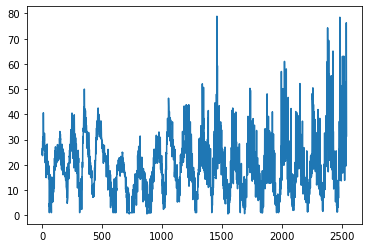

In [3]:
plt.plot(t, array)

In [4]:
hw = 200
@interact(m=(hw, n-hw, hw))
def subview(m=hw):
    a = max(0, m-hw)
    b = min(n, m+hw)
    plt.plot(t[a:b], array[a:b])

interactive(children=(IntSlider(value=200, description='m', max=2342, min=200, step=200), Output()), _dom_clas…

In [5]:
ff = fft(array)
sig = abs(ff)*2/n
sig[0] /= 2

<StemContainer object of 3 artists>

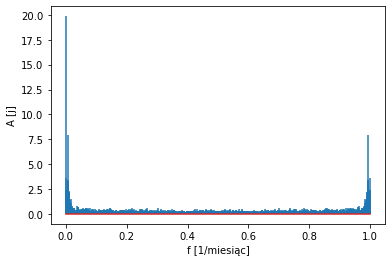

In [6]:
f = np.arange(n)/n
plt.xlabel("f [1/miesiąc]")
plt.ylabel("A [j]")
plt.stem(f, sig, markerfmt=" ")

<StemContainer object of 3 artists>

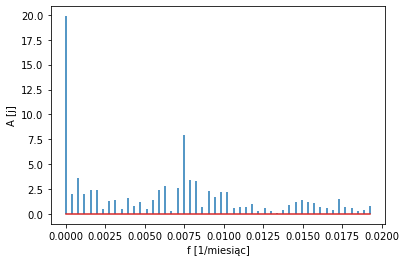

In [7]:
plt.xlabel("f [1/miesiąc]")
plt.ylabel("A [j]")
plt.stem(f[:50], sig[:50], markerfmt=" ")

In [8]:
np.argmax(sig)

0

In [9]:
saf = f[np.argpartition(sig, -2)[-2]]
print(saf)
ivl = 1/saf/12
print(ivl)

0.007474429583005508
11.149122807017543


# Zadanie 2 - proste filtrowanie

Wykreśl sygnał $sin(2*pi*t) + sin(4*pi*t)$, T=1s, w=20Hz. Za pomocą FFT, przekształć sygnał do dziedziny częstotliwości. Następnie usuń składowe o częstotliwości 2Hz. Tak zmodyfikowany sygnał przekształć do dziedziny czasu i wykreśl go.

In [10]:
w2 = 20
T2 = 1
t2 = np.arange(0, T2, 1/w2)
y2 = np.sin(2*pi*t2) + np.sin(4*pi*t2)

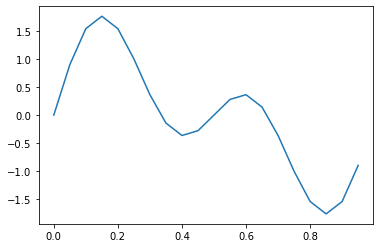

In [11]:
plt.plot(t2, y2)

In [12]:
n2=len(t2)
ff2 = fft(y2)
ff2[2] = ff2[-2] = 0

<StemContainer object of 3 artists>

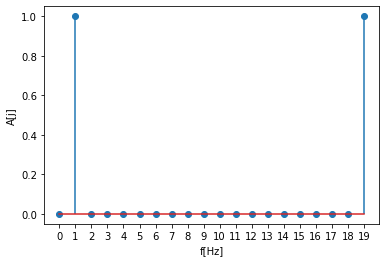

In [13]:
ff2a = abs(ff2)*2/n2
ff2a[0]/=2
f2 = np.arange(n2)/n2*w2
plt.xticks(np.arange(n2))
plt.xlabel("f[Hz]")
plt.ylabel("A[j]")
plt.stem(f2, ff2a)

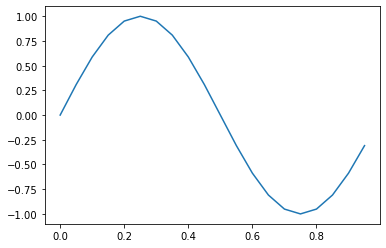

In [14]:
y2c = ifft(ff2).real
plt.plot(t2, y2c)

# Zadanie 3 - Informacja o fazie

Wykreśl sygnał $sin(2*pi*t) + sin(4*pi*t)$, T=1s, w=20Hz. Tym razem oprócz spektrum, wykreśl wykres z informacją o fazie poszczególnych częstotliwości (faza = arg(z)), gdzie z=a+bi. To samo wykonaj dla sin(2*pi*t) + cos(4*pi*t). Porównaj otrzymane wykresy. Przydatna może być funkcja angle (z parametrem deg=True)

In [15]:
w3 = 20
T3 = 1
t3 = np.arange(0, T3, 1/w3)
f3 = np.arange(0, w3)
n3 = len(t3)
y3a = np.sin(2*pi*t3) + np.sin(4*pi*t3)

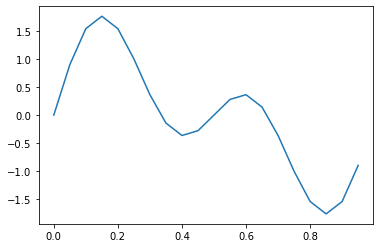

In [16]:
plt.plot(t3, y3a)

In [17]:
y3b = np.sin(2*pi*t3) + np.cos(4*pi*t3)

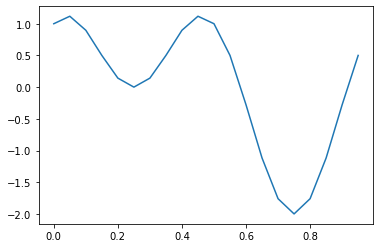

In [18]:
plt.plot(t3, y3b)

In [19]:
def show_phase(y, f):
    ff = fft(y)
    ang = np.angle(ff, deg=True)
    ang1 = ang.copy()
    ang1[np.abs(ff)<0.01]=0
    fig, ax = plt.subplots(2)
    for a in ax:
        a.set_xlabel("f[Hz]")
        a.set_ylabel(r"$\varphi$[deg]")
        a.set_yticks(np.arange(-180, 181, 45))
        a.set_xticks(range(n3))
    ax[0].stem(f, ang)
    ax[1].stem(f, ang1)

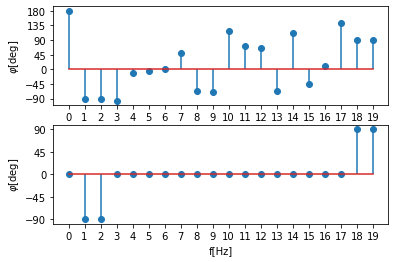

In [20]:
show_phase(y3a, f3)

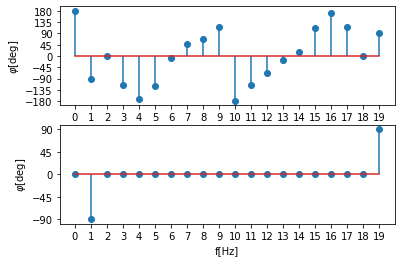

In [21]:
show_phase(y3b, f3)

# Zadanie 4 - plik wejsciowy audio

Wczytaj plik err.wav. Wykreśl jego spektrum. Spróbuj także skali logarytmicznej. Określ dominujące w sygnale częstotliwości. Przydatne:

import scipy.io.wavfile

w, signal = scipy.io.wavfile.read('err.wav')

signal = [s[0] for s in signal]   #Tylko pierwszy kanał

yscale(‘log’)

spectrum[::10]        # co 10-ty element


<StemContainer object of 3 artists>

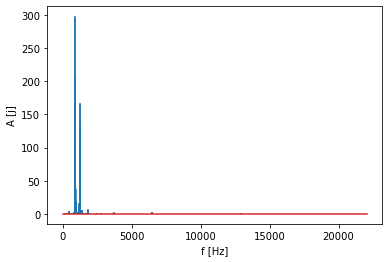

In [22]:
import scipy.io.wavfile

w4_0, signal = scipy.io.wavfile.read('err.wav')
w4 = 44100
x4 = w4_0//w4
signal = [s[0] for s in signal] #Tylko pierwszy kanał
signal = signal[::x4]
n4 = len(signal)
f4 = np.arange(n4)/n4*w4
ff4 = fft(signal)
ff4 = abs(ff4)*2/n4
f4 = f4[:n4//2]
ff4 = ff4[:n4//2]

plt.ylabel("A [j]")
plt.xlabel("f [Hz]")
plt.stem(f4, ff4, markerfmt=" ")

<StemContainer object of 3 artists>

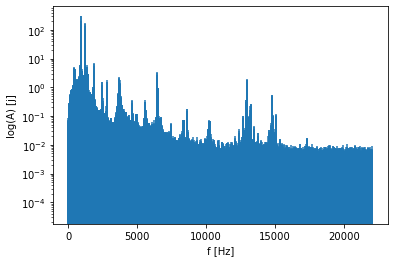

In [23]:
plt.ylabel("log(A) [j]")
plt.xlabel("f [Hz]")
plt.yscale('log')
plt.stem(f4, ff4, markerfmt=" ")

In [24]:
topn = lambda ar, n: np.argpartition(ar, -n)[-n:]
freq = f4[topn(ff4, 5)]
print(sorted([round(x,1) for x in freq]))

[929.7, 930.7, 931.8, 1242.4, 1243.4]


In [25]:
md = next(i for i in range(len(f4)) if f4[i] > 1000)
freq1 = f4[topn(ff4[:md], 5)]
freq2 = f4[topn(ff4[md:], 5)+md]
print(np.round(freq1, 1))
print(np.round(freq2, 1))

[928.7 932.8 931.8 929.7 930.7]
[1240.3 1244.4 1241.3 1242.4 1243.4]


In [26]:
fr1 = np.mean(freq1)
fr2 = np.mean(freq2)
print("f1 = %.1f Hz" % (fr1))
print("f2 = %.1f Hz" % (fr2))

f1 = 930.7 Hz
f2 = 1242.4 Hz
